In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2022-04-11 21:04:00.653095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-11 21:04:00.653198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('data/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-11 21:04:49.376642: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-11 21:04:49.376784: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-04-11 21:04:50.051510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 2.8266 - accuracy: 0.4270

2022-04-11 21:05:16.073381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 29s 398ms/step - loss: 2.8266 - accuracy: 0.4270 - val_loss: 1.8623 - val_accuracy: 0.4444
Epoch 2/20
61/61 [==============================] - 22s 357ms/step - loss: 1.2953 - accuracy: 0.5208 - val_loss: 1.6271 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 22s 355ms/step - loss: 1.1859 - accuracy: 0.5920 - val_loss: 1.6330 - val_accuracy: 0.4444
Epoch 4/20
61/61 [==============================] - 22s 356ms/step - loss: 0.9345 - accuracy: 0.6258 - val_loss: 0.7399 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 22s 355ms/step - loss: 1.1616 - accuracy: 0.5941 - val_loss: 1.7211 - val_accuracy: 0.4444
Epoch 6/20
61/61 [==============================] - 22s 358ms/step - loss: 0.8658 - accuracy: 0.6663 - val_loss: 0.8713 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 22s 360ms/step - loss: 0.9899 - accuracy: 0.6586 - val_loss: 0.8732 - val_accuracy: 0.6667
Epoch 8/20

In [19]:
import matplotlib.pyplot as plt

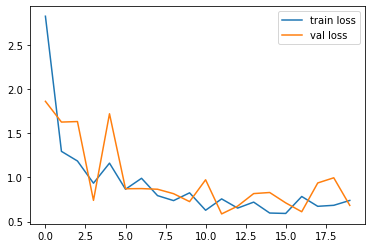

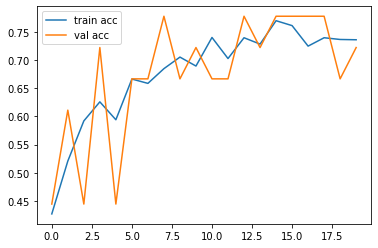

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [22]:

y_pred = model.predict(test_set)


2022-04-11 21:12:29.972584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [23]:
y_pred

array([[9.99171734e-01, 2.34348221e-07, 7.89102574e-04, 3.89179222e-05],
       [2.26635183e-03, 2.83605844e-01, 9.60505977e-02, 6.18077219e-01],
       [1.25041641e-02, 5.88901937e-02, 3.99986088e-01, 5.28619528e-01],
       [8.24812893e-03, 2.97453344e-01, 3.55886936e-01, 3.38411570e-01],
       [2.05176626e-03, 9.81778741e-01, 4.28503583e-04, 1.57410223e-02],
       [2.48936354e-03, 9.94690180e-01, 3.39592283e-04, 2.48080981e-03],
       [4.47700313e-06, 3.97983541e-07, 9.99972343e-01, 2.26876036e-05],
       [7.67248347e-02, 7.95787394e-01, 9.59841833e-02, 3.15036401e-02],
       [1.26893446e-03, 9.01628554e-01, 9.06509757e-02, 6.45149313e-03],
       [3.48416995e-03, 4.62017983e-01, 2.60147691e-01, 2.74350226e-01],
       [4.07179905e-04, 1.04191577e-06, 9.99591529e-01, 2.17533142e-07],
       [4.07010652e-02, 1.83364726e-04, 1.14632234e-01, 8.44483376e-01],
       [2.98355650e-02, 3.49366575e-01, 6.09974146e-01, 1.08237844e-02],
       [1.37372568e-04, 1.15571012e-04, 9.99649763e

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 3, 3, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 0])

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')